In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_original.csv')
df.head()

,ESTRES_PERCIBIDO,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EXPEMOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,...,SCL90_PSICOT,CAPE_POSIT_FREC,CAPE_POS_MALESTAR,CAPE_NEG_FREC,CAPE_NEG_MALESTAR,CAPE_DEPRE_FREC,CAPE_DEPRE_MALESTAR,TRAUMA_FRECUENCIA,TRAUMA_AFECTACION,SPQ_TOTAL_ESQUIZOT
0,23,17,5,0,0,7,5,13,2,20,...,0,24,4,14,0,8,0,4,8,0
1,22,13,11,3,10,6,11,17,11,17,...,9,22,2,29,33,11,3,9,29,0
2,10,20,20,20,16,11,8,3,0,20,...,5,30,9,29,21,10,2,12,25,1
3,7,12,1,0,7,4,6,3,1,18,...,0,20,0,16,2,8,0,4,10,0
4,31,8,9,17,13,4,14,2,6,27,...,17,35,13,36,26,19,19,17,48,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 90% de los datos para entrenamiento y un 10% de los datos para validación
valid_idx  =  range ( len ( df ) - 29 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['SCL90_ANS_FOB', 'SCL90_DEPRE', 'ANSIEDADRASGO', 'CSI_REESTCOGN', 'CSL90_SENS_INT', 'SCL90_PSICOT', 'SCL90_IDEA_PARAN', 'TRAUMA_AFECTACION', 'CSI_RESPROBL', 'CAPE_POSIT_FREC', 'CSI_AUTOCRIT', 'CSI_EXPEMOC', 'CAPE_NEG_FREC', 'CAPE_DEPRE_MALESTAR', 'CAPE_DEPRE_FREC', 'CSI_APOYOSOC', 'SCL90_ANSIE', 'CSI_EVITPROBL', 'CSL90_HOSTIL', 'CAPE_NEG_MALESTAR', 'CAPE_POS_MALESTAR', 'CSI_PENSDESID', 'SCL90_SOMAT', 'TRAUMA_FRECUENCIA', 'CSI_RETISOC', 'ESTRES_PERCIBIDO', 'SCL90_OBS_COMP']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[-0.51262  -1.030897 -1.032027  0.157968 ... -0.648816 -1.261759 -2.373473 -1.197909]
 [ 0.406092 -0.152023  0.500214  0.157968 ... -0.081654  0.014066  0.129386  0.288837]
 [-0.696362 -0.950999  1.11311  -1.502846 ...  2.092468 -1.474397 -0.943268 -1.091713]
 [-0.328877 -0.551511  0.193766  0.527037 ...  0.958143  0.864615  0.963673 -0.242144]
 [ 2.427258  1.126339  0.34699  -0.026567 ... -1.310505 -0.198572 -0.228165  0.819818]]
[0 0 0 0 0]


In [9]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.922141,0.894929,0.689655,02:32
1,0.763566,0.830972,0.689655,02:31
2,0.668450,0.763675,0.689655,02:31
3,0.601288,0.702759,0.655172,02:30
4,0.546308,0.701737,0.655172,02:32


SCL90_ANS_FOB,SCL90_DEPRE,ANSIEDADRASGO,CSI_REESTCOGN,CSL90_SENS_INT,SCL90_PSICOT,SCL90_IDEA_PARAN,TRAUMA_AFECTACION,CSI_RESPROBL,CAPE_POSIT_FREC,CSI_AUTOCRIT,CSI_EXPEMOC,CAPE_NEG_FREC,CAPE_DEPRE_MALESTAR,CAPE_DEPRE_FREC,CSI_APOYOSOC,SCL90_ANSIE,CSI_EVITPROBL,CSL90_HOSTIL,CAPE_NEG_MALESTAR,CAPE_POS_MALESTAR,CSI_PENSDESID,SCL90_SOMAT,TRAUMA_FRECUENCIA,CSI_RETISOC,ESTRES_PERCIBIDO,SCL90_OBS_COMP,target,prediction
0.5898,0.1676,0.0405,-0.5802,0.4778,1.1624,-0.1294,0.9432,-1.2916,0.3136,-0.3827,-0.7875,0.6933,1.1100,0.5821,-1.4423,0.2722,-0.7728,0.2362,0.8558,1.0705,-0.7319,-0.0945,1.0527,0.2267,-0.1090,0.1826,2,1
-0.6964,-0.6314,-0.2659,-1.1338,-0.2051,-0.5814,-0.3251,-0.1727,-2.0915,-0.4674,-1.0878,-0.5962,0.6933,1.1100,0.3498,0.4289,-0.4465,-1.4318,-0.1974,2.0357,-0.0131,-0.3960,-0.5763,-0.4598,-1.0491,1.9171,0.2888,0,1
-0.6964,-0.9510,0.1938,0.7116,-0.7514,-0.8497,-0.7164,-0.3444,1.3080,-0.4674,-0.9116,-0.7875,0.2923,-0.3965,-0.3471,0.5990,-0.5662,-0.7728,-0.8476,0.5835,-0.2298,-1.9074,-0.6727,-0.6488,-0.1986,-0.5857,-0.7731,0,0
-0.1451,1.1263,-0.7256,-0.7647,0.8875,-0.4473,-0.1294,0.0419,-0.8917,-0.6236,-1.2641,-0.4049,-0.1087,-0.6703,-0.3471,-0.7619,0.7513,-0.5531,1.3199,-1.0504,-0.7716,-0.8998,1.0619,1.0527,-0.4112,-0.1090,0.1826,2,0
-0.1451,-0.5515,-0.8788,-0.2111,-0.2051,0.0893,-0.9120,-1.0740,-1.6916,-0.3112,-1.0878,-0.9788,-0.1087,0.6991,0.3498,-0.2515,-0.2069,0.3257,-0.4141,0.4019,-0.1214,-0.7319,-0.4800,-1.1215,-0.8365,-0.1090,0.1826,1,0


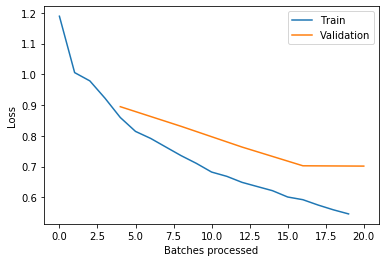

In [10]:
learn.recorder.plot_losses()
learn.show_results()